In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import itertools
import sys 
import matplotlib.colors as mc

sys.path.append("../") 

# Importing the functions from src
from src.eda_plotting import correlation_heatmap, swarm_grid, distribution_grid, boxplot_grid, regplot_grid

## Preprocessing

In [2]:
data = pd.read_csv('../data/raw/candy-data.csv')
print(data.info())
data.head()

<class 'pandas.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     str    
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), str(1)
memory usage: 9.9 KB
None


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
# Rename the columns of DATA for convenience
NewNames = ["CandyName", "Chocolate", "Fruity", "Caramel", "PeanutyAlmondy", "Nougat", "CrispedRiceWafer",
            "Hard", "Bar", "PluriBus", "SugarPercent", "PricePercent", "WinPercent"]

data.rename(columns=dict(zip(data.columns,NewNames)), inplace=True)
data.describe()

,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,SugarPercent,PricePercent,WinPercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [4]:
# Check if data is complete and has no missing values
foo = data.isnull().sum()
if (foo.sum() == 0):
    print("PASS CHECK!")
else:
    print(foo)

PASS CHECK!


Since the dataset is complete (has no missing values), and has no apparent anomalies, no specific pre-processing tasks are required.

In [5]:
data.to_csv('../data/processed/candy-data-processed.csv', index=False)

## EDA (correlations and visualisations)

In [6]:
# Categorize the variables
Target          = "WinPercent"
FlavorFeats     = ["Chocolate", "Fruity", "Caramel", "PeanutyAlmondy", "Nougat", "CrispedRiceWafer"]
FormFeats       = ["Hard", "Bar", "PluriBus"]
ContinuousFeats = ["SugarPercent", "PricePercent"]
Features        = FlavorFeats + FormFeats + ContinuousFeats

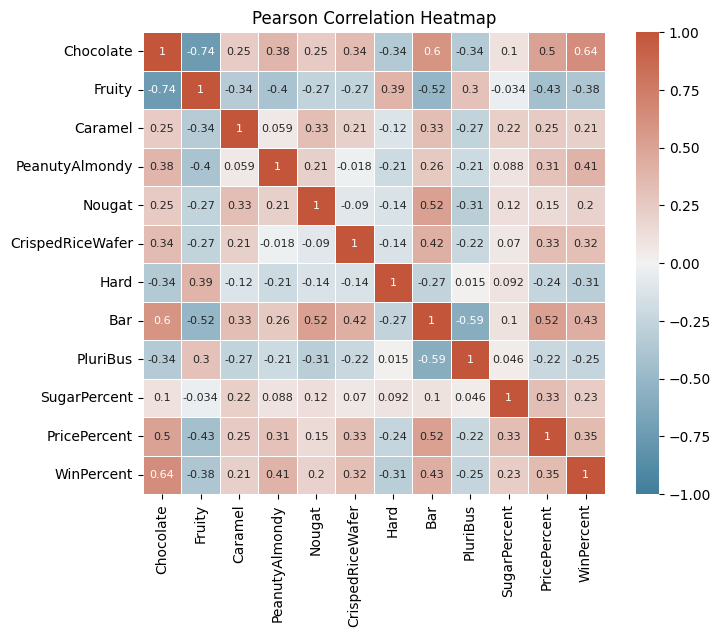

In [7]:
correlation_heatmap(data, Features + [Target], "Pearson Correlation Heatmap")

In [29]:
# correlate values sorted by absolute value
corr = data[Features + [Target]].corr(method='pearson')['WinPercent']
corr.loc[corr.abs().sort_values(ascending=False).index]

WinPercent          1.000000
Chocolate           0.636517
Bar                 0.429929
PeanutyAlmondy      0.406192
Fruity             -0.380938
PricePercent        0.345325
CrispedRiceWafer    0.324680
Hard               -0.310382
PluriBus           -0.247448
SugarPercent        0.229151
Caramel             0.213416
Nougat              0.199375
Name: WinPercent, dtype: float64

Top 3 highest linar correlation between feature and target: 
- Chocolate and WinPercent
- Bar and WinPercent
- PeanutAlmondy and WinPercent

High correlation between featrures (greater than 0.5):
- Chocolate and Fruity (-ve indicates candies that "have chocolate" tends strongly to "not being fruity" and vice versa) \
  What about if we develop a new candy that has chocolate and is also fruity?
- Chocolate and Bar ("having chocolate" is strongly related to "being a bar".)
- Bar and PluriBus ("Being a bar" is strongly related to not being in "collection", kind of makes sense..)
- Bar and PricePercent (bars are more expensive)
- Bar and and Nougat
- Bar and Fruity (-ve)

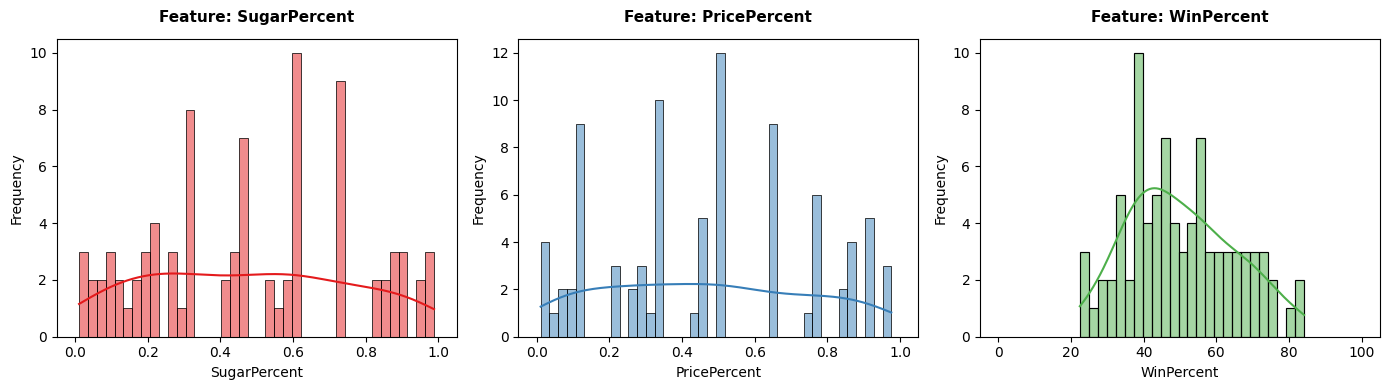

In [8]:
numeric_cols = ContinuousFeats + [Target]
palette = sns.color_palette("Set1", n_colors=len(numeric_cols))
colors_dict = {
    col: palette[i]
    for i, col in enumerate(numeric_cols)
}
bin_dict = {
    "SugarPercent": 40,
    "PricePercent": 40,
    "WinPercent": 25
}
limits = {"SugarPercent":[-0.05,1.05], "PricePercent":[-0.05,1.05], "WinPercent":[-5,105]}
distribution_grid(data, numeric_cols, colors_dict, bin_dict, limits_dict=limits)

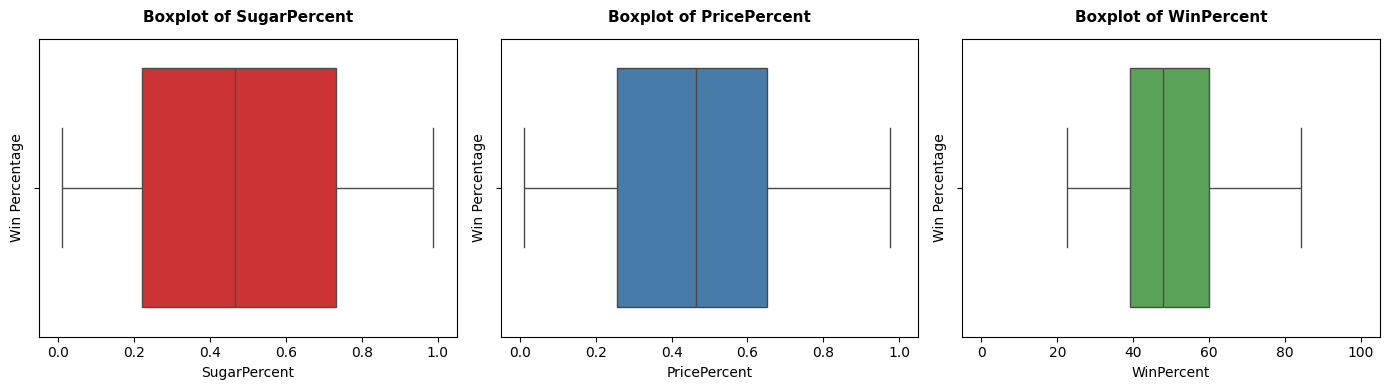

In [9]:
boxplot_grid(data, numeric_cols, colors_dict, limits_dict=limits)

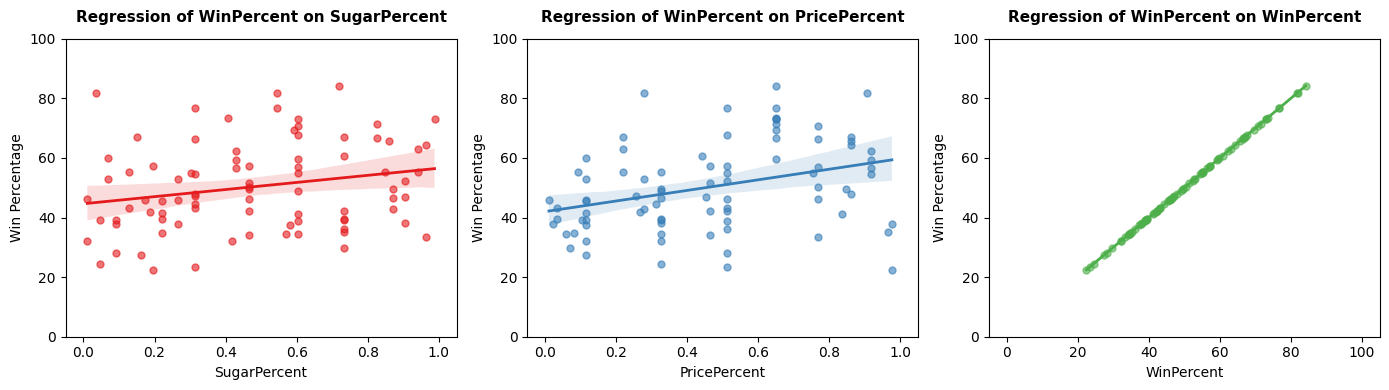

In [10]:
regplot_grid(data, numeric_cols, Target, colors_dict, x_limits_dict=limits, y_limits_dict={"SugarPercent":[0, 100], "PricePercent":[0, 100], "WinPercent":[0, 100]})

- WinPercent lies between 20-80 and averaging around 50
- Price has a slightly more positive correlation with winning (0.35) than sugar does

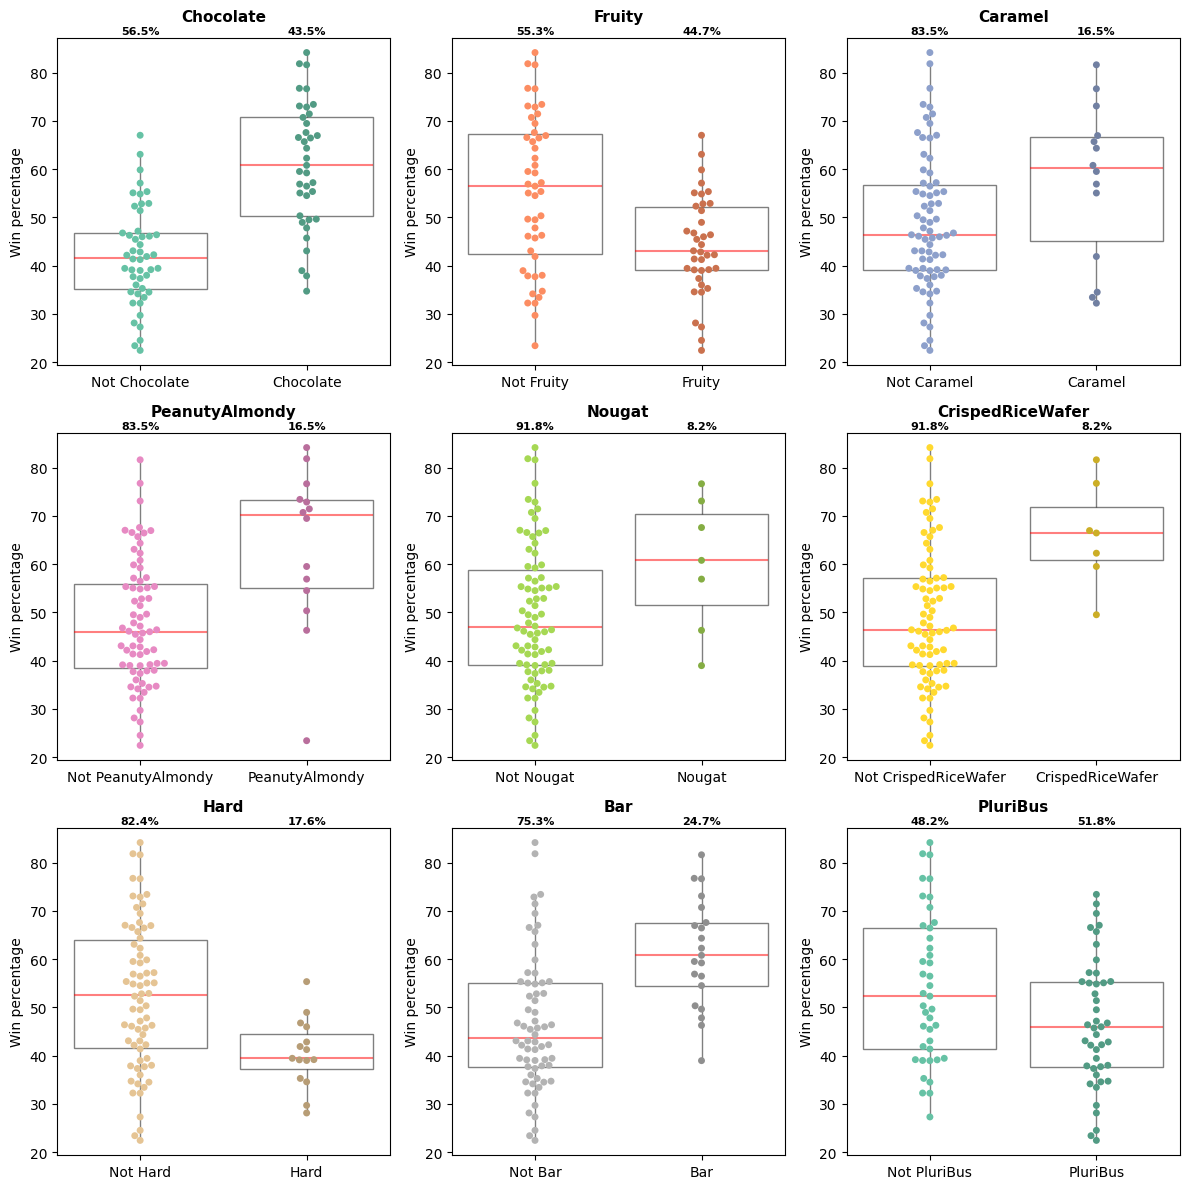

In [11]:
binary_columns = FlavorFeats + FormFeats

labels_dict = {
    col: [f"Not {col}", col] 
    for col in binary_columns
}
palette = sns.color_palette("Set2", n_colors=len(binary_columns))
def darken(color, amount=0.8): 
    r, g, b = color
    return (r * amount, g * amount, b * amount)

colors_dict = {
    col: [palette[i], darken(palette[i])]  # same palette but two shades
    for i, col in enumerate(binary_columns)
}

swarm_grid(data, binary_columns, Target, labels_dict, colors_dict, max_cols=3, figsize=(12, 4))

There is high class imbalance for these features, ie there is not enough variation in them
- Nougat
- CrispedRiceWafer 

These feature have moderate variation

- Caramel 
- Hard
- PeanutAlmondy
- Bar

Data set is small so we need to find the major trends and be cautious of places where we dont have enough data

## Feature wise analysis for main features (that have enough variation)

In [34]:
def phi_coefficient(x, y):
    table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(table)
    n = table.sum().sum()
    return np.sqrt(chi2 / n)

def phi_matrix(df, binary_cols):
    results = []
    for a, b in itertools.combinations(binary_cols, 2):
        phi = phi_coefficient(df[a], df[b])
        results.append((a, b, phi))
    return (
        pd.DataFrame(results, columns=["Feature1", "Feature2", "Phi"])
        .assign(AbsPhi=lambda d: d["Phi"].abs())
        .sort_values("AbsPhi", ascending=False)
        .reset_index(drop=True)
    )

In [36]:
phi_matrix(data, binary_columns).head(10)

,Feature1,Feature2,Phi,AbsPhi
0,Chocolate,Fruity,0.717858,0.717858
1,Chocolate,Bar,0.569913,0.569913
2,Bar,PluriBus,0.566115,0.566115
3,Fruity,Bar,0.487634,0.487634
4,Nougat,Bar,0.473364,0.473364
5,CrispedRiceWafer,Bar,0.374138,0.374138
6,Fruity,PeanutyAlmondy,0.367383,0.367383
7,Fruity,Hard,0.359642,0.359642
8,Chocolate,PeanutyAlmondy,0.345837,0.345837
9,Chocolate,PluriBus,0.315931,0.315931


### Chocolate

In [13]:
print('p-value = {0:.10%}'.format(stats.ttest_ind(data[data['Chocolate'] == 0]['WinPercent'], 
                                               data[data['Chocolate'] == 1]['WinPercent'])[1]))

p-value = 0.0000000059%


Based on swarm/Box plot and P value its safe to say chocolate has statistical influence on WinPercent. \
Now checking which features could be impacting analysis

In [40]:
data.groupby("Chocolate").agg( Count=("WinPercent", "size"), 
                            **{f"Mean_{col}": (col, "mean") for col in binary_columns + numeric_cols}).reset_index()
# the mean number indicates percentafe of cadies with that feature in the group.
# For example, 0.5 for Chocolate means 50% of candies in that group contain chocolate.
# If the mean for both the groups is similar then that features impact can be assumed to be averaged out.
# Main emphasis will be on features that have enough variation between themselves.

,Chocolate,Count,Mean_Chocolate,Mean_Fruity,Mean_Caramel,Mean_PeanutyAlmondy,Mean_Nougat,Mean_CrispedRiceWafer,Mean_Hard,Mean_Bar,Mean_PluriBus,Mean_SugarPercent,Mean_PricePercent,Mean_WinPercent
0,0,48,0.0,0.770833,0.083333,0.041667,0.020833,0.000000,0.291667,0.020833,0.666667,0.452937,0.343021,42.142257
1,1,37,1.0,0.027027,0.270270,0.324324,0.162162,0.189189,0.027027,0.540541,0.324324,0.512000,0.632162,60.921529


CrispedRiceWafer and Bar have mostly only been used for Chocolate \
Check for cases were Fruity impact is taken out, then how does Chocolate effect WinPercent?

In [41]:
data.groupby(['Fruity', 'Chocolate']).agg(Count=("WinPercent", "size"), 
                                          MeanPricePercent=("PricePercent", "mean"),
                                          MeanSugarPercent=("SugarPercent", "mean"),
                                          MeanWinPercent=("WinPercent", "mean"), 
                                          ).reset_index()

,Fruity,Chocolate,Count,MeanPricePercent,MeanSugarPercent,MeanWinPercent
0,0,0,11,0.376909,0.415000,35.932801
1,0,1,36,0.640694,0.509444,61.253165
2,1,0,37,0.332946,0.464216,43.988311
3,1,1,1,0.325000,0.604000,48.982651


**Chocolate leads to better MeanWinPercent** 

### Fruity

In [18]:
print('p-value = {0:.10%}'.format(stats.ttest_ind(data[data['Fruity'] == 0]['WinPercent'], 
                                               data[data['Fruity'] == 1]['WinPercent'])[1]))

p-value = 0.0322290574%


Based on swarm/Box plot and P value its safe to say Fruity has statistical influence on WinPercent \
But Fruity also has strong correlation with Chocolate, so we need to check if the impact of fruity on WinPercent is independent of Chocolate

In [42]:
data.groupby("Fruity").agg( Count=("WinPercent", "size"), 
                            **{f"Mean_{col}": (col, "mean") for col in binary_columns + numeric_cols}).reset_index()

,Fruity,Count,Mean_Chocolate,Mean_Fruity,Mean_Caramel,Mean_PeanutyAlmondy,Mean_Nougat,Mean_CrispedRiceWafer,Mean_Hard,Mean_Bar,Mean_PluriBus,Mean_SugarPercent,Mean_PricePercent,Mean_WinPercent
0,0,47,0.765957,0.0,0.276596,0.297872,0.148936,0.148936,0.042553,0.446809,0.382979,0.487340,0.578957,55.327122
1,1,38,0.026316,1.0,0.026316,0.000000,0.000000,0.000000,0.342105,0.000000,0.684211,0.467895,0.332737,44.119741


PeanutyAlmondy, Nougat, CrispedRiceWafer, Bar are never tried with Fruity \
Check for cases were Chocolate impact is taken out, how does Fruity effect WinPercent?

In [21]:
data.groupby(['Chocolate', 'Fruity']).agg(Count=("WinPercent", "size"), MeanWinPercent=("WinPercent", "mean") ).reset_index()

,Chocolate,Fruity,Count,MeanWinPercent
0,0,0,11,35.932801
1,0,1,37,43.988311
2,1,0,36,61.253165
3,1,1,1,48.982651


The negative Fruity–WinPercent correlation was misleading. It mainly reflected the strong either‑Chocolate‑or‑Fruity pattern in the dataset. Among non‑chocolate candies, Fruity actually increases WinPercent. Because very few products combine Fruity and Chocolate, we don’t have enough evidence to judge their joint effect.

**Fruity or Chocolate chocolate seems safer bet**

## PluriBus

In [47]:
print('p-value = {0:.10%}'.format(stats.ttest_ind(data[data['PluriBus'] == 0]['WinPercent'], 
                                               data[data['PluriBus'] == 1]['WinPercent'])[1]))

p-value = 2.2418039113%


In [48]:
data.groupby("PluriBus").agg( Count=("WinPercent", "size"), 
                            **{f"Mean_{col}": (col, "mean") for col in binary_columns + numeric_cols}).reset_index()

,PluriBus,Count,Mean_Chocolate,Mean_Fruity,Mean_Caramel,Mean_PeanutyAlmondy,Mean_Nougat,Mean_CrispedRiceWafer,Mean_Hard,Mean_Bar,Mean_PluriBus,Mean_SugarPercent,Mean_PricePercent,Mean_WinPercent
0,0,41,0.609756,0.292683,0.268293,0.243902,0.170732,0.146341,0.170732,0.512195,0.0,0.46539,0.533854,54.066404
1,1,44,0.272727,0.590909,0.068182,0.090909,0.000000,0.022727,0.181818,0.000000,1.0,0.49100,0.408341,46.822781


In [50]:
data.groupby(['PluriBus', 'Chocolate']).agg(Count=("WinPercent", "size"), MeanWinPercent=("WinPercent", "mean") ).reset_index()

,PluriBus,Chocolate,Count,MeanWinPercent
0,0,0,16,40.301844
1,0,1,25,62.875723
2,1,0,32,43.062463
3,1,1,12,56.850294


No clear impact on MeanWinPercent

## Bar

In [43]:
print('p-value = {0:.10%}'.format(stats.ttest_ind(data[data['Bar'] == 0]['WinPercent'], 
                                               data[data['Bar'] == 1]['WinPercent'])[1]))

p-value = 0.0040186353%


Based on swarm/Box plot and P value its safe to say Bar has statistical influence on WinPercent

In [44]:
data.groupby("Bar").agg( Count=("WinPercent", "size"), 
                            **{f"Mean_{col}": (col, "mean") for col in binary_columns + numeric_cols}).reset_index()

,Bar,Count,Mean_Chocolate,Mean_Fruity,Mean_Caramel,Mean_PeanutyAlmondy,Mean_Nougat,Mean_CrispedRiceWafer,Mean_Hard,Mean_Bar,Mean_PluriBus,Mean_SugarPercent,Mean_PricePercent,Mean_WinPercent
0,0,64,0.265625,0.59375,0.093750,0.109375,0.000000,0.015625,0.234375,0.0,0.6875,0.462547,0.384531,46.714395
1,1,21,0.952381,0.00000,0.380952,0.333333,0.333333,0.285714,0.000000,1.0,0.0000,0.527714,0.725952,61.295413


In [46]:
data.groupby(['Chocolate', 'Bar']).agg(Count=("WinPercent", "size"), MeanWinPercent=("WinPercent", "mean") ).reset_index()

,Chocolate,Bar,Count,MeanWinPercent
0,0,0,47,42.053867
1,0,1,1,46.296597
2,1,0,17,59.599384
3,1,1,20,62.045353


Not enough bars without chocolate \
Chocolate with or without bar seems to be similar


In [23]:
data.groupby(binary_columns).agg(Count=("WinPercent", "size"), MeanWinPercent=("WinPercent", "mean") ).reset_index()

,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,Count,MeanWinPercent
0,0,0,0,0,0,0,0,0,0,2,39.188795
1,0,0,0,0,0,0,0,0,1,3,36.630752
2,0,0,0,0,0,0,1,0,1,1,29.703691
3,0,0,0,1,0,0,0,0,1,1,23.417824
4,0,0,0,1,1,0,0,1,0,1,46.296597
5,0,0,1,0,0,0,0,0,0,1,32.230995
6,0,0,1,0,0,0,0,0,1,1,33.437550
7,0,0,1,0,0,0,1,0,0,1,41.904308
8,0,1,0,0,0,0,0,0,0,5,43.882512
9,0,1,0,0,0,0,0,0,1,19,46.662800


## Hard to get individual effect, because no enough data where only one thing changes..